# Change point detection

- people usually apply it to timeseries but in reality it can be applied to any kind of ordered data (doesn't have to be ordered over time).

- At some changepoint (tau), all of the data prior to tau and all of the data after are different

Good tutorial here: https://www.youtube.com/watch?v=I7jUBro78RM



In [10]:
#install.packages("changepoint")

In [11]:
library(data.table)
library(dplyr)
library(ggplot2)
library(tidyr)
library(changepoint)

First create a pretend data set that has the same characteristics as Charles' actual data.  Basically, if kids can count to 46 or below, they don't have the successer function (as evidenced by a score of chance - 50% - on the +1 task); if they do have the successer function (80% on the task) they usually can count all the way to 100.

We can also generate ages for them, but not really relevant here.

In [12]:
set.seed(1)
nosucfunc <- sample(8:46, size = 70, replace = TRUE)
nobody <- sample(46:99, size = 10, replace = TRUE)
yessucfunc <- sample(99:100, size = 20, replace = TRUE)

# create some vectors of pretend data for 100 kids like Charles' histogram
countsto <- c(nosucfunc, nobody, yessucfunc)
countfunc <- ifelse(countsto < 46, rnorm(100, mean = 50, sd = 5), 
                    rnorm(100, mean=80, sd = 5))
age <- ifelse(countsto < 46, rnorm(100, mean=5, sd = 1), 
                                   rnorm(100, mean = 6, sd = 1))



Since we we need ordered data to use change point analysis, we can order our data by how high the kids can count.

In [13]:
# merge to dataframe and order by how high they can count
data <- data.frame(countsto, countfunc, age) %>%
    arrange(countsto) 

# inspect data
head(data, 10)

countsto,countfunc,age
8,47.78354,2.710876
8,43.61704,5.765599
10,49.32473,4.574732
10,46.72708,6.654145
11,58.83644,6.512213
11,52.47094,3.705860
12,45.32951,7.649167
12,48.47908,5.945185
14,49.80380,4.610763
15,57.16512,5.695551


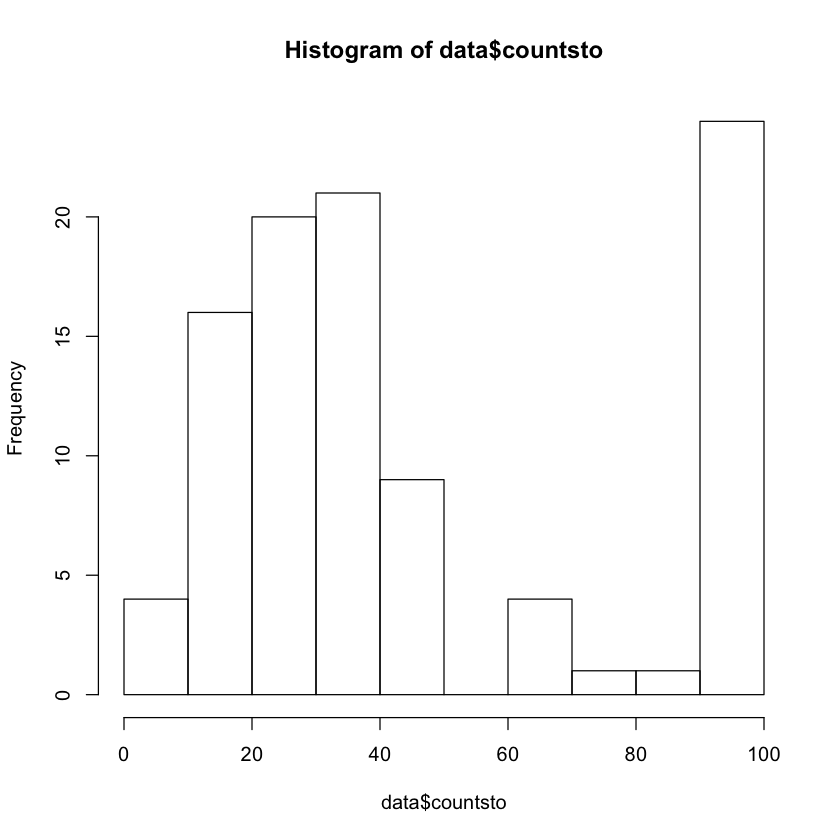

In [14]:
# make sure the data looks roughly like Charles'
# histogram of how high kids can count in pretend dataset
hist(data$countsto, breaks = 10)

Now we can use the changepoint package (cpt.mean function) to see where it detects a point of change in the mean of our ordered data.

In [15]:
# cpt.mean takes a vector or ordered data, so we just give it 
# the kids score on the +1 task (ordered by how high they can count)
data.changept <- cpt.mean(data$countfunc)
cpts(data.changept)

[1] 69

This is telling us there is a change point detected at point number 69 - this corresponds to kid number 69.  You can see the data plotted by their % correct on the task (x-axis) and the ID of the kid (ordered by how high they can count).

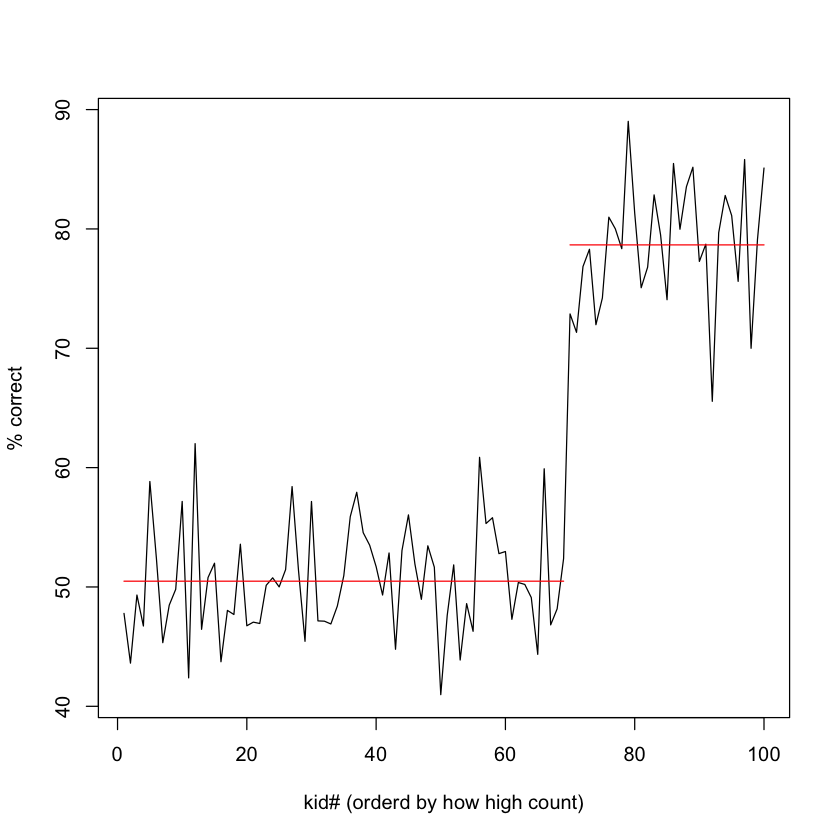

In [16]:
plot(data.changept, xlab = "kid# (orderd by how high count)", ylab = "% correct")

So let's look at kid #69 and the kids near him to see what the characteristics of the change point are. Remember it's super important that the data be ordered by how high the kids can count.

In [17]:
data[65:75, ]

,countsto,countfunc,age
65,43,44.35318,4.752336
66,43,59.90200,6.146228
67,43,46.82132,6.043612
68,44,48.16389,2.596904
69,44,52.37755,4.741067
70,46,72.87753,6.567952
71,64,71.33391,7.435070
72,64,76.84850,5.934932
73,64,78.29516,4.240531
74,67,71.97243,5.220431


And what you can see is that the change point is at the last kid who counts to a number below 46.

The changepoint detection basically just doing a likelihood ratio test, taking a model with this changepoint and comparing it to a model without this changepoint and telling you the changepoint model fits better (and what changepoint has the best fit).  The underlying parameters of the model have a correction for the fact that the changepoint model has more parameters and will tend to fit better no matter what.  

I haven't done much with this, but I think the assumptions work for the data Charles' has fairly well.  I don't see a reason why you couldn't do something like this?  Maybe there are restrictions about having unequal amounts of data at different points, but that doesn't seem to matter as far as I can see. Especially since the data is so clear...  

It's also nice the I didn't assume anything about the changepoint ahead of time; I just asked to detect a single change in mean, where that is and if it fits the data.  It identifed the kid at the cusp of 46 on it's own.